In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import warnings

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score, LeaveOneOut

warnings.filterwarnings('ignore')

[*********************100%%**********************]  2 of 2 completed
Cross-validation MSE:  0.00017879984346037977


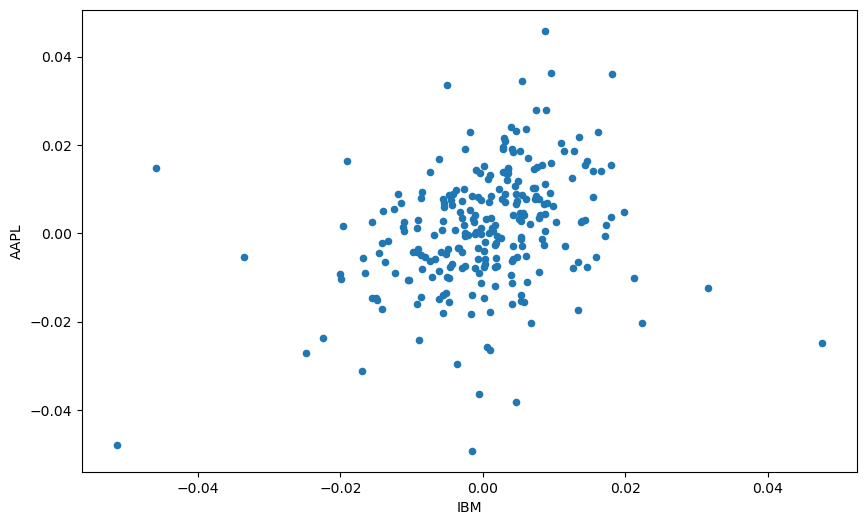

In [18]:
data = yf.download(['AAPL', 'IBM'], period='1Y')['Adj Close']
returns = np.log(data).diff().dropna()

fig, ax = plt.subplots(figsize=(10, 6))

returns.plot(kind='scatter', x='IBM', y='AAPL', ax=ax)

n = returns.shape[0]

MSE_list = list()

for i in range(n):
    train = returns.drop(returns.index[i])
    valid = returns.iloc[[i]]

    model = LinearRegression()
    model.fit(train[['IBM']], train[['AAPL']])
    pred = model.predict(valid[['IBM']])[0][0]

    MSE_list.append((valid[['AAPL']] - pred)**2)

CV = np.mean(MSE_list)

print('Cross-validation MSE: ', CV)

## Cross validation

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,5,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...,...
387,393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


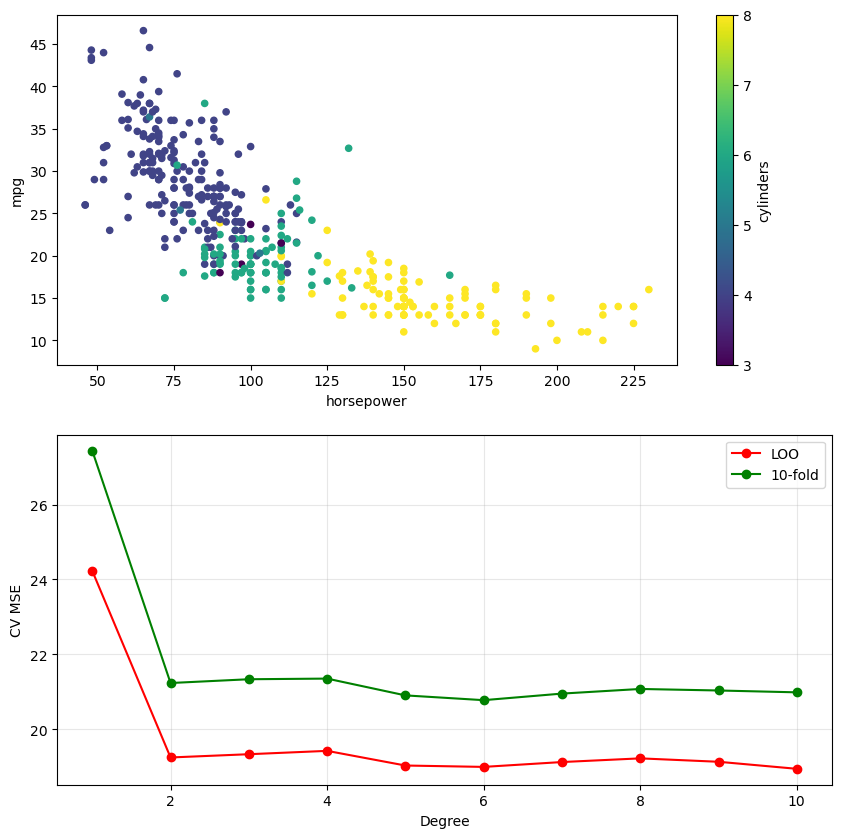

In [3]:
df = pd.read_csv('Auto.csv')

display(df)

fig, (ax, ax2) = plt.subplots(2, figsize=(10, 10))

df.plot(kind='scatter', ax=ax, x='horsepower', y='mpg', c='cylinders', colormap='viridis')

# fit polynomial regression model
X = df[['horsepower']]
y = df['mpg']

MSE_list_LOO = list()
MSE_list_10 = list()

# use loo cross validation

for i in range(1, 11):
    poly = PolynomialFeatures(degree=i)
    X_poly = poly.fit_transform(X)
    
    LOO = LeaveOneOut()
    model = LinearRegression()
    MSE_list_LOO.append(-cross_val_score(model, X_poly, y, cv=LOO, scoring='neg_mean_squared_error').mean())
    MSE_list_10.append(-cross_val_score(model, X_poly, y, cv=10, scoring='neg_mean_squared_error').mean())

ax2.plot(range(1, 11), MSE_list_LOO, marker='o', color='red', label='LOO')
ax2.plot(range(1, 11), MSE_list_10, marker='o', color='green', label='10-fold')
ax2.set_xlabel('Degree')
ax2.set_ylabel('CV MSE')
ax2.grid(alpha=0.3)
ax2.legend()

